# star classification
ML project to classify stars types based on basics star's characteristics.



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

In [26]:
df = pd.read_csv(r"data\star type\Stars.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


## analyzing data

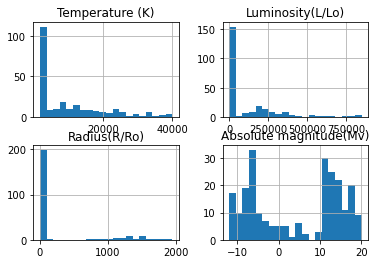

In [28]:
df[df.columns[:4]].hist(bins=20)
plt.show()

## data processing

In [29]:
df["Star color"] = df["Star color"].str.lower().str.strip()
df["Star color"].value_counts()

red                   112
blue                   56
blue-white             27
blue white             14
white                  10
yellow-white            8
yellowish white         3
yellowish               3
whitish                 2
orange                  2
pale yellow orange      1
white-yellow            1
orange-red              1
Name: Star color, dtype: int64

In [30]:
df.replace(to_replace=["whitish"], value="white", inplace=True)
df.replace(to_replace=["white-yellow", "white yellow orange", "yellowish", "yellowish white"],
           value="yellow-white", inplace=True)
df.replace(to_replace=["pale yellow orange", "orange-red"], value="orange", inplace=True)
df.replace(to_replace=["blue white"], value="blue-white", inplace=True)

df["Star color"].value_counts()

red             112
blue             56
blue-white       41
yellow-white     15
white            12
orange            4
Name: Star color, dtype: int64

In [31]:
#Sklearn LabelEncoder makes it in alphabetical order, that's not good ,because "red" should be the last (the lowest temp) 
# label_encoder = LabelEncoder()
# label_encoder.fit(['blue', 'blue-white', 'white', 'yellow-white', 'red'])
# label_encoder.classes_

def label(array):
    labels = ['blue', 'blue-white', 'white', 'yellow-white','orange', 'red']
    return list(map(labels.index, array))

df["Star color"] = label(df["Star color"])
df["Star color"].value_counts()

5    112
0     56
1     41
3     15
2     12
4      4
Name: Star color, dtype: int64

In [32]:
label_encoder = LabelEncoder()
label_encoder.fit(df["Spectral Class"])
df["Spectral Class"] = label_encoder.transform(df["Spectral Class"])
label_encoder.classes_

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [33]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,5,5
1,3042,0.000500,0.1542,16.60,0,5,5
2,2600,0.000300,0.1020,18.70,0,5,5
3,2800,0.000200,0.1600,16.65,0,5,5
4,1939,0.000138,0.1030,20.06,0,5,5
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,6
236,30839,834042.000000,1194.0000,-10.63,5,0,6
237,8829,537493.000000,1423.0000,-10.73,5,2,0
238,9235,404940.000000,1112.0000,-11.23,5,2,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Spectral Class", axis=1),
                                                    df["Spectral Class"],
                                                    test_size=0.33)

In [35]:
pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', KNeighborsClassifier())
])

parameters = [{'scaler': [StandardScaler(), MinMaxScaler(), Normalizer()]},
            {'classifier': [KNeighborsClassifier()],
            'classifier__n_neighbors': [1, 3, 5, 7, 10]}]
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

D:\Anaconda_pliki_instalacyjne\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
print(f"train test accuracy: {grid.score(X_train, y_train)} \ntest set accuracy: {grid.score(X_test, y_test)}")

train test accuracy: 1.0 
test set accuracy: 0.8625


In [37]:
print(grid.best_params_)
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': KNeighborsClassifier(n_neighbors=1), 'classifier__n_neighbors': 1}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])
